In [17]:
import ROOT as r

In [18]:
f = r.TFile("pienux_out_stripped.root")
f.ls()

TFile**		pienux_out_stripped.root	
 TFile*		pienux_out_stripped.root	
  KEY: TTree	atar;6	Energy deposited in the ATAR [current cycle]
  KEY: TTree	atar;5	Energy deposited in the ATAR [backup cycle]
  KEY: TTree	atar;4	Energy deposited in the ATAR [backup cycle]
  KEY: TTree	calorimeter;2	Energy deposited in the calorimeter [current cycle]
  KEY: TTree	calorimeter;1	Energy deposited in the calorimeter [backup cycle]
  KEY: TTree	degrader;2	Degrader [current cycle]
  KEY: TTree	degrader;1	Degrader [backup cycle]
  KEY: TTree	init;2	Initial conditions of the simulation [current cycle]
  KEY: TTree	init;1	Initial conditions of the simulation [backup cycle]


In [19]:
t= f.Get("calorimeter")

In [20]:
print([x.GetName() for x in t.GetListOfBranches()])

['time', 'edep', 'x', 'y', 'z', 'r', 'theta', 'phi', 'theta_e', 'phi_e', 'nparticles', 'has_pion', 'has_muon']


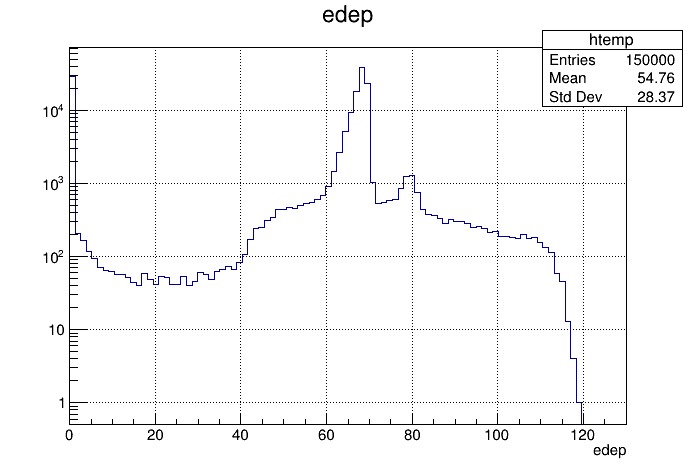

In [21]:
c=r.TCanvas()
t.Draw("edep")
c.SetLogy()
c.SetGrid()
c.Draw()

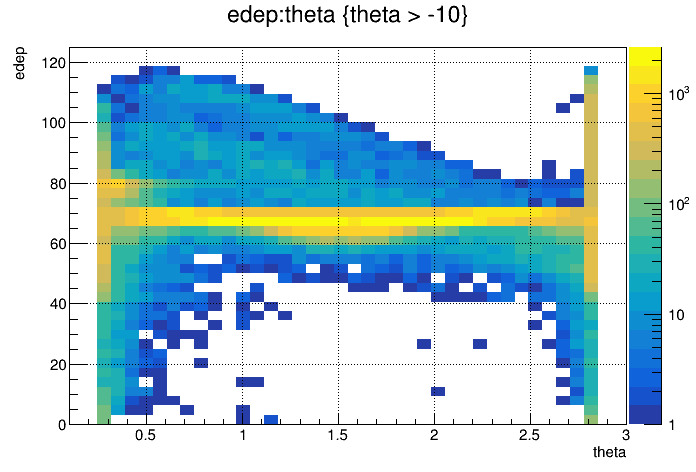

In [22]:
c=r.TCanvas()
t.Draw("edep:theta","theta > -10","colz")
c.SetLogz()
c.SetGrid()
c.Draw()

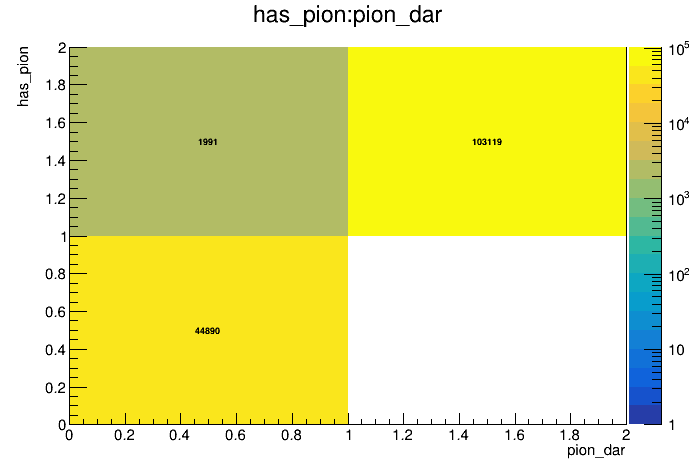

In [23]:
t2 = f.Get("atar")
c = r.TCanvas()
t2.Draw("has_pion:pion_dar","","colz text")
c.SetLogz()
c.Draw()

In [24]:
t.AddFriend("atar")

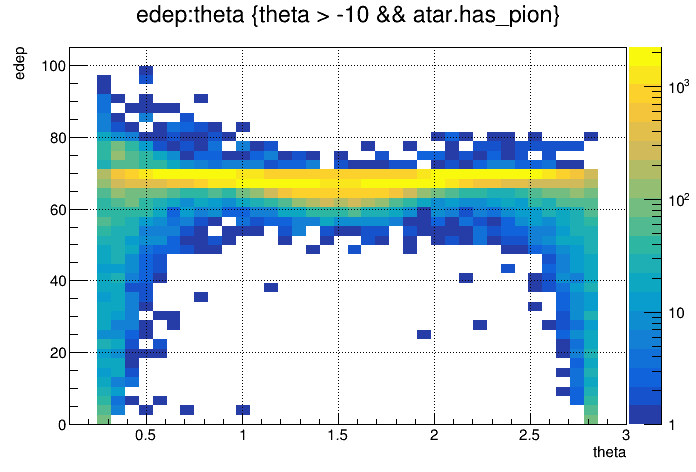

In [25]:
c=r.TCanvas()
t.Draw("edep:theta","theta > -10 && atar.has_pion","colz")
c.SetLogz()
c.SetGrid()
c.Draw()

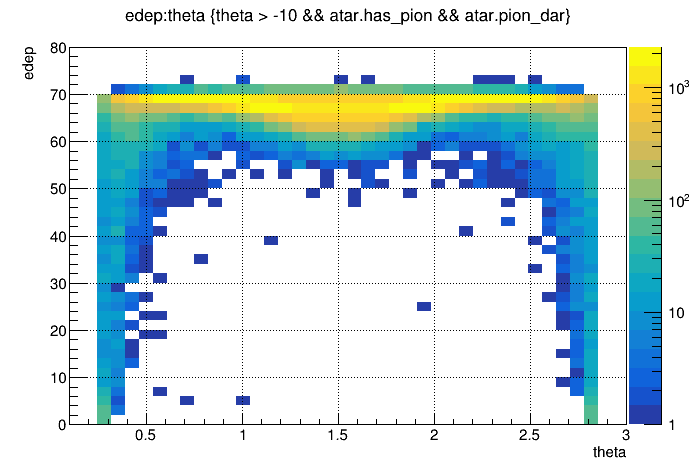

In [26]:
c=r.TCanvas()
t.Draw("edep:theta","theta > -10 && atar.has_pion && atar.pion_dar","colz")
c.SetLogz()
c.SetGrid()
c.Draw()

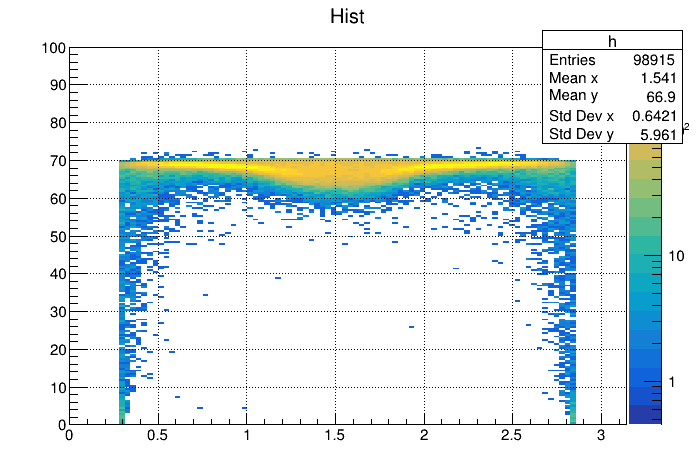

In [27]:
h = r.TH2D("h","Hist", 
            100,0,3.14,
            200,0,100)

c=r.TCanvas()
t.Draw("edep:theta>>h","theta > -10 && atar.has_pion && atar.pion_dar","colz")
c.SetLogz()
c.SetGrid()
c.Draw()

In [28]:
h

In [29]:
fout = r.TFile("outfile.root","recreate")
h.Write()
fout.Write()
fout.Close()

TFile**		outfile.root	
 TFile*		outfile.root	
  KEY: TH2D	h;1	Hist


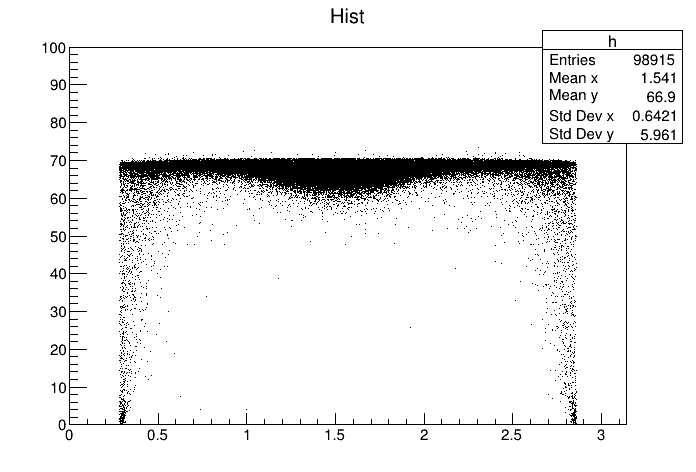

In [30]:
f2 = r.TFile("outfile.root")
f2.ls()
fout = f2.Get("h")

c = r.TCanvas()
fout.Draw()
c.Draw()

In [31]:
for i, e in enumerate(t):
    print(i, e.edep)
    if(i > 10):
        break

0 66.54940219379883
1 68.45524528054504
2 0.0
3 68.50127846620872
4 60.51130455029082
5 68.87601274005712
6 79.97908969735792
7 64.42962307485158
8 0.0
9 89.80313175428056
10 94.50455408109002
11 68.39099310479737


In [32]:
for i, e in enumerate(t2):
    print(i, e.pixel_edep)
    if(i > 5):
        break

0 { 0.32196402, 0.18651209, 0.19973939, 0.20740486, 0.23631399, 0.10705207, 0.078966824, 0.20768118, 0.19003222, 0.21675176, 0.20591482, 0.20713623, 0.21690566, 0.31548821, 0.22345260, 0.28568796, 0.32302985, 0.22518654, 0.22791292, 0.26865691, 0.29749083, 0.24425076, 0.29052236, 0.30822717, 0.35494419, 0.35024874, 0.042182522, 0.38652183, 0.43984248, 0.36785083, 0.45365136, 0.47894385, 0.65449529, 0.82886410, 1.6170274, 0.023305489, 0.10888910, 0.055602843, 0.058481461, 0.094043997, 0.026867191, 0.085645595, 0.030271266, 0.058970681, 0.053261733, 0.019381560, 0.16033938, 0.0096354299, 0.010496877, 0.11271682, 0.0093650540, 0.085779408, 0.070091689, 0.11006765, 0.049958174, 0.00092665713, 0.11632142, 0.016467218, 0.030208735, 0.057574934, 0.046907260, 0.059497315, 0.0044075327, 0.089580834, 0.0096005361, 0.0085766061, 0.088424709, 0.0092206404, 0.072663551, 0.028034786, 0.049231053, 0.063383459, 0.058523287, 0.062053452, 0.0061819127, 0.058616293, 0.014309095, 0.11731759, 0.077769250, 